# Visualizations of COVID Statistics among States (U.S.) 

#### COVID-19 has had a tremendous impact on the United States, but its effects have not been uniform.  This Jupyter Notebook shows how the number of cases and deaths fluctuate by region, month, and even day of the week.

In [3]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
import gmaps
import os
from fbprophet import Prophet

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'gmaps'

## 1. Color-based visualizations of Worldometer data

#### https://www.worldometers.info/coronavirus/country/us/ has done an excellent job of tracking COIVD cases in the U.S.  To easily compare relative magnitudes, this section re-displays the table with a scaled colormap.

In [2]:
#Reading the data sets
df = pd.read_csv('./Resources/worldmetersUS1.csv')
#Load Data
df_us = df.copy()
df_us = df_us.drop(['NewCases','Unnamed: 0.1','NewDeaths','Unnamed: 0'], axis=1)
df_us_old = df_us.copy()
df_us

,USAState,TotalCases,TotalDeaths,ActiveCases,Total_Cases/1M pop,Deaths/1M pop,TotalTests,Tests\n1M pop,Latitude,Longitude
0,USA Total,"1,218,638","70,727","959,133","3,682",214,"7,535,605","22,766",37.291140,-120.505736
1,New York,"327,374","25,174","248,855","16,687","1,283","1,007,310","51,345",41.676259,-73.896615
2,New Jersey,"129,345","7,951","120,123","14,563",895,"275,900","31,063",40.700948,-74.173630
3,Massachusetts,"69,087","4,090","56,879","10,115",599,"324,268","47,476",42.350724,-71.324371
4,Illinois,"63,840","2,662","60,533","4,979",208,"333,147","25,983",41.780119,-87.643841
...,...,...,...,...,...,...,...,...,...,...
59,Federal Prisons,"2,340",40,"1,608",NaN,NaN,NaN,NaN,37.842690,-90.504733
60,Grand Princess Ship,103,3,100,NaN,NaN,NaN,NaN,41.141023,-94.984766
61,Wuhan Repatriated,3,NaN,3,NaN,NaN,3,NaN,20.881910,-156.520641
62,Diamond Princess Ship,46,NaN,46,NaN,NaN,46,NaN,39.766121,-105.606489


### 1.1 Total Covid 19 Case as of May 3rd

In [3]:
total_cases = df['TotalCases'][0]
print(f'The Total Covid 19 Cases Across the United States (As of May 3rd): {total_cases}' )

The Total Covid 19 Cases Across the United States (As of May 3rd): 1,218,638


### 1.2 Data Cleaning - Make sure all table data are floats or integers

In [4]:
df_us.dtypes

USAState               object
TotalCases             object
TotalDeaths            object
ActiveCases            object
Total_Cases/1M pop     object
Deaths/1M pop          object
TotalTests             object
Tests\n1M pop          object
Latitude              float64
Longitude             float64
dtype: object

In [27]:
# Make a copy of the dataframe
df_us_2 = df_us.copy()
# Drop the first row of the table - the total U.S. data
df_us_2 = df_us_2.drop(0, axis=0)
# Change all of these columns from an object to either an integer or float
df_us_2['TotalCases'] = df_us['TotalCases'].str.replace(",","").astype(int)
df_us_2['TotalDeaths'] = df_us['TotalDeaths'].str.replace(",","").astype(float)
df_us_2['ActiveCases'] = df_us['ActiveCases'].str.replace(",","").astype(float)
df_us_2['Total_Cases/1M pop'] = df_us['Total_Cases/1M pop'].str.replace(",","").astype(float)
df_us_2['Deaths/1M pop'] = df_us['Deaths/1M pop'].str.replace(",","").astype(float)
df_us_2['TotalTests'] = df_us['TotalTests'].str.replace(",","").astype(float)
df_us_2['Tests\n1M pop'] = df_us['Tests\n1M pop'].str.replace(",","").astype(float)

In [34]:
# Round-up all data to whole numbers
df_us_2 = df_us_2.round(0)
# Fill in any data as zeroes
df_us_2 = df_us_2.fillna(0)
df_us_2.head()

,USAState,TotalCases,TotalDeaths,ActiveCases,Total_Cases/1M pop,Deaths/1M pop,TotalTests,Tests\n1M pop,Latitude,Longitude
1,New York,327374,25174.0,248855.0,16687.0,1283.0,1007310.0,51345.0,42.0,-74.0
2,New Jersey,129345,7951.0,120123.0,14563.0,895.0,275900.0,31063.0,41.0,-74.0
3,Massachusetts,69087,4090.0,56879.0,10115.0,599.0,324268.0,47476.0,42.0,-71.0
4,Illinois,63840,2662.0,60533.0,4979.0,208.0,333147.0,25983.0,42.0,-88.0
5,California,56306,2294.0,46448.0,1438.0,59.0,750287.0,19165.0,34.0,-118.0


In [35]:
# Drop the bottom row and drop the Latitude and Longitude column
df_us_3 = df_us_2.drop(63, axis=0)
df_us_3 = df_us_3.drop(['Latitude','Longitude'], axis=1)

### 1.3 Presenting the Color Gradient Tables

In [36]:
#Display all Data Using gradient
#Total cases as of May 3rd
df_us_3.style.background_gradient(cmap='Reds')

,USAState,TotalCases,TotalDeaths,ActiveCases,Total_Cases/1M pop,Deaths/1M pop,TotalTests,Tests 1M pop
1,New York,327374,25174.000000,248855.000000,16687.000000,1283.000000,1007310.000000,51345.000000
2,New Jersey,129345,7951.000000,120123.000000,14563.000000,895.000000,275900.000000,31063.000000
3,Massachusetts,69087,4090.000000,56879.000000,10115.000000,599.000000,324268.000000,47476.000000
4,Illinois,63840,2662.000000,60533.000000,4979.000000,208.000000,333147.000000,25983.000000
5,California,56306,2294.000000,46448.000000,1438.000000,59.000000,750287.000000,19165.000000
6,Pennsylvania,52922,3012.000000,48927.000000,4137.000000,235.000000,250882.000000,19614.000000
7,Michigan,43950,4135.000000,24156.000000,4414.000000,415.000000,229183.000000,23016.000000
8,Florida,37439,1471.000000,35282.000000,1818.000000,71.000000,467553.000000,22699.000000
9,Texas,33188,920.000000,15603.000000,1190.000000,33.000000,407528.000000,14614.000000
10,Connecticut,30173,2556.000000,27552.000000,8425.000000,714.000000,105330.000000,29409.000000


In [37]:
# Display just Active Cases Data Using gradient
df_us_2 = df_us.drop(63, axis=0)
df_us_2 = df_us.drop(0, axis=0)
#Total Active Covid 19 Case
total_active_us = df_us_2[['USAState','ActiveCases']]
total_active_us.style.background_gradient(cmap='Reds')

,USAState,ActiveCases
1,New York,"248,855"
2,New Jersey,"120,123"
3,Massachusetts,"56,879"
4,Illinois,"60,533"
5,California,"46,448"
6,Pennsylvania,"48,927"
7,Michigan,"24,156"
8,Florida,"35,282"
9,Texas,"15,603"
10,Connecticut,"27,552"


## 2.0 Creating a Heatmap of COVID Statistics Using Gmaps

#### Due to the nature of pandemics, it is impossible to understand the spread of COVID without visualizing its impact on a map.  Here, we see which regions of the contiguous U.S. have the most active cases.

In [38]:
#Enter Google Geocode Key
gkey = ""

In [39]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [40]:
#Save lat and lng as a dataframe
df_us_2 = df_us_2.drop(63, axis=0)
locations = df_us_2[['Latitude','Longitude']]
active_cases = df_us_3['ActiveCases']
#Set active as weight
max_cases = active_cases.max()

In [41]:
#Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

In [42]:
fig = gmaps.figure(layout=figure_layout)
heat_layer = gmaps.heatmap_layer(locations, weights = active_cases, dissipating=False, max_intensity=max_cases, point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

## 3.0 Plotting Confirmed and Recovered Cases in Seaborn

#### Seaborn's visualization tools are a fantastic way to compare the recoveries of COVID to the total number of cases.

In [43]:
# Determine the number of Recovered Cases by Subtracting the deaths and 
# Active Cases from the total number of cases.

df_us_4 = df_us_3.copy()
df_us_4 = df_us_4[['USAState','TotalCases','TotalDeaths','ActiveCases']]
df_us_4['Cured'] = df_us_4['TotalCases']-df_us_4['ActiveCases']-df_us_4['TotalDeaths']
df_us_4 = df_us_4.drop([53,55,57,58,59,60,61,62,52,56], axis=0)
df_us_4 = df_us_4.reset_index(drop=True)
df_us_4

,USAState,TotalCases,TotalDeaths,ActiveCases,Cured
0,New York,327374,25174.0,248855.0,53345.0
1,New Jersey,129345,7951.0,120123.0,1271.0
2,Massachusetts,69087,4090.0,56879.0,8118.0
3,Illinois,63840,2662.0,60533.0,645.0
4,California,56306,2294.0,46448.0,7564.0
5,Pennsylvania,52922,3012.0,48927.0,983.0
6,Michigan,43950,4135.0,24156.0,15659.0
7,Florida,37439,1471.0,35282.0,686.0
8,Texas,33188,920.0,15603.0,16665.0
9,Connecticut,30173,2556.0,27552.0,65.0


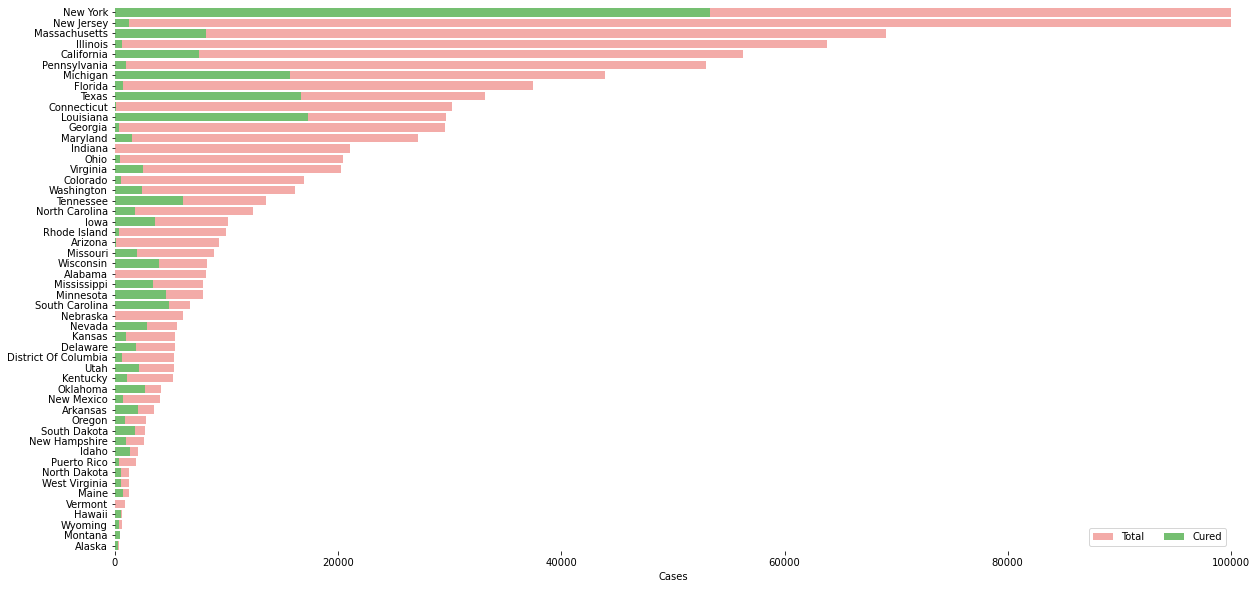

In [44]:
#Use Seaborn for visualization
f, ax = plt.subplots(figsize=(20, 10))
data = df_us_4[['USAState','TotalCases','Cured','TotalDeaths']]
data.sort_values('TotalCases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="TotalCases", y="USAState", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="USAState", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## 4.0 How Quickly are Coronavirus Cases Rising?

#### Probably the most important question related to COVID.  This section uses Plotly to produce various visualizations that trend the rise of COVID statistics.

### 4.1 Cumulative Cases Data

In [45]:
#Import Cumulative Cases By Date
df2 = pd.read_csv("./Resources/us_county.csv")

In [46]:
# Create copy
us_county = df2.copy()
us_county.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [47]:
#Groupby dates, sum the number of deaths and cases.
us_county_dates = us_county.groupby('date')['cases','deaths'].sum()
us_county_dates = us_county_dates.reset_index()


### 4.2 New Cases Data

In [54]:
#Import New Cases by Date
us_newcases = pd.read_csv('./Resources/US_newcases.csv')
us_newcases = us_newcases.drop(['Unnamed: 0','cases','deaths'], axis=1)

In [55]:
us_newcases

,date,NewCases
0,1/21/2020,1
1,1/22/2020,0
2,1/23/2020,0
3,1/24/2020,1
4,1/25/2020,1
...,...,...
99,4/29/2020,26401
100,4/30/2020,30393
101,5/1/2020,33984
102,5/2/2020,29598


### 4.3 Single Parameter Visualizations

In [56]:
# Rise of COVID-19 cases in US
import plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x = us_county_dates['date'],y = us_county_dates['cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in United States (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in US

fig = px.bar(us_newcases, x = 'date',y = 'NewCases',  barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in United States on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [57]:
us_newcases1 = us_newcases.copy()
us_newcases1.columns = ['Date','NewCases']

In [58]:
# import plotly.express as px
fig = px.bar(us_newcases1, x="Date", y="NewCases", color='NewCases', orientation='v', height=600,
             title='New Coronavirus Cases in the US', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### 4.4 Multiparameter Visualizations

In [59]:
df3 = pd.read_csv("./Resources/us_daily.csv")
df3.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200505,56,1195605,6348723.0,2633.0,50906.0,129357.0,9348.0,4794.0,4818.0,...,129357.0,7546961,7544328,7544328,NaN,2527.0,1960.0,236802.0,22152.0,258954.0
1,20200504,56,1173453,6111921.0,2791.0,50062.0,127397.0,9366.0,4579.0,4848.0,...,127397.0,7288165,7285374,7285374,NaN,912.0,1601.0,210561.0,21447.0,232008.0
2,20200503,56,1152006,5901360.0,2812.0,50312.0,125796.0,9292.0,4502.0,4761.0,...,125796.0,7056178,7053366,7053366,NaN,1158.0,1936.0,221838.0,26287.0,248125.0
3,20200502,56,1125719,5679522.0,1578.0,51734.0,123860.0,9403.0,4386.0,4845.0,...,123860.0,6806819,6805241,6805241,NaN,1651.0,2112.0,223393.0,30038.0,253431.0
4,20200501,56,1095681,5456129.0,1639.0,52370.0,121748.0,9205.0,4300.0,4707.0,...,121748.0,6553449,6551810,6551810,NaN,1739.0,9761.0,262863.0,33178.0,296041.0


In [60]:
list(df3.columns)

['date',
 'states',
 'positive',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'recovered',
 'hash',
 'dateChecked',
 'death',
 'hospitalized',
 'total',
 'totalTestResults',
 'posNeg',
 'fips',
 'deathIncrease',
 'hospitalizedIncrease',
 'negativeIncrease',
 'positiveIncrease',
 'totalTestResultsIncrease']

In [61]:
confirmed = df3.groupby('date').sum()['positive'].reset_index()
deaths = df3.groupby('date').sum()['death'].reset_index()
recovered = df3.groupby('date').sum()['recovered'].reset_index()

In [62]:
confirmed['date'] = confirmed.apply(lambda x: pd.to_datetime(confirmed['date'], format='%Y%m%d'))
recovered['date'] = recovered.apply(lambda x: pd.to_datetime(recovered['date'], format='%Y%m%d'))
deaths['date'] = deaths.apply(lambda x: pd.to_datetime(deaths['date'], format='%Y%m%d'))

In [63]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['positive'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['death'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

## 5.0 Forecasting Total Number of Cases in the United States

#### Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. (source: https://facebook.github.io/prophet/)

#### In this last exercise, we use Prophet's forecasting model to predict the rise (and hopefully fall) of COVID cases.  We start with a baseline model that trains the date, then make forecasts seven days and fourteen days out.


### 5.1 Confirm Dataset is suitable for Prophet

In [64]:
confirmed.dtypes

date        datetime64[ns]
positive             int64
dtype: object

In [69]:
#Change numeric value to timestamp
confirmed1 = confirmed.copy()
confirmed1.columns = ['ds','y']
#confirmed1['ds'] = confirmed1.apply(lambda x: pd.to_datetime(confirmed['ds'], format='%Y%m%d'))

In [70]:
confirmed1.tail()

,ds,y
100,2020-05-01,1095681
101,2020-05-02,1125719
102,2020-05-03,1152006
103,2020-05-04,1173453
104,2020-05-05,1195605


### 5.2 Forecasting Confirmed COVID-19 Cases in the U.S. (Base model)

In [71]:
m = Prophet(interval_width=0.95)
m.fit(confirmed1)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
107,2020-05-08
108,2020-05-09
109,2020-05-10
110,2020-05-11
111,2020-05-12


In [74]:
#Predicting the future with date, and upper and lower limit of y value 
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
107,2020-05-08,1.293310e+06,1.285041e+06,1.299260e+06
108,2020-05-09,1.322809e+06,1.311589e+06,1.331917e+06
109,2020-05-10,1.350656e+06,1.336387e+06,1.362574e+06
110,2020-05-11,1.377295e+06,1.357900e+06,1.392623e+06
111,2020-05-12,1.404587e+06,1.379900e+06,1.423928e+06


In [75]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

In [78]:
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
97,2020-04-28,1.007204e+06,1.000873e+06,1.009710e+06,1.007204e+06,1.007204e+06,-1882.394719,-1882.394719,-1882.394719,-1882.394719,-1882.394719,-1882.394719,0.0,0.0,0.0,1.005321e+06
98,2020-04-29,1.035723e+06,1.030440e+06,1.039198e+06,1.035723e+06,1.035723e+06,-968.516886,-968.516886,-968.516886,-968.516886,-968.516886,-968.516886,0.0,0.0,0.0,1.034754e+06
99,2020-04-30,1.064242e+06,1.059496e+06,1.068083e+06,1.064242e+06,1.064242e+06,-530.749566,-530.749566,-530.749566,-530.749566,-530.749566,-530.749566,0.0,0.0,0.0,1.063711e+06
100,2020-05-01,1.092761e+06,1.089255e+06,1.097873e+06,1.092761e+06,1.092761e+06,916.902648,916.902648,916.902648,916.902648,916.902648,916.902648,0.0,0.0,0.0,1.093677e+06
101,2020-05-02,1.121280e+06,1.119194e+06,1.127561e+06,1.121280e+06,1.121280e+06,1896.154819,1896.154819,1896.154819,1896.154819,1896.154819,1896.154819,0.0,0.0,0.0,1.123176e+06
102,2020-05-03,1.149799e+06,1.146890e+06,1.155131e+06,1.149799e+06,1.149799e+06,1224.579762,1224.579762,1224.579762,1224.579762,1224.579762,1224.579762,0.0,0.0,0.0,1.151023e+06
103,2020-05-04,1.178318e+06,1.173735e+06,1.181824e+06,1.178318e+06,1.178318e+06,-655.976058,-655.976058,-655.976058,-655.976058,-655.976058,-655.976058,0.0,0.0,0.0,1.177662e+06
104,2020-05-05,1.206837e+06,1.200541e+06,1.209358e+06,1.206837e+06,1.206837e+06,-1882.394719,-1882.394719,-1882.394719,-1882.394719,-1882.394719,-1882.394719,0.0,0.0,0.0,1.204954e+06
105,2020-05-06,1.235356e+06,1.229950e+06,1.238602e+06,1.234152e+06,1.236317e+06,-968.516886,-968.516886,-968.516886,-968.516886,-968.516886,-968.516886,0.0,0.0,0.0,1.234387e+06
106,2020-05-07,1.263875e+06,1.257496e+06,1.268013e+06,1.259845e+06,1.266979e+06,-530.749566,-530.749566,-530.749566,-530.749566,-530.749566,-530.749566,0.0,0.0,0.0,1.263344e+06


In [79]:
#Convert data from scienctific notation to integers
forecast2 = forecast.copy()
forecast2 = forecast2.drop('ds', axis=1)
forecast3 = forecast2.astype(int)
date = forecast['ds']
date = pd.DataFrame(date)
forecast4 = date.join(forecast3)


In [80]:
forecast4.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
97,2020-04-28,1007203,1000873,1009710,1007203,1007203,-1882,-1882,-1882,-1882,-1882,-1882,0,0,0,1005321
98,2020-04-29,1035722,1030440,1039198,1035722,1035722,-968,-968,-968,-968,-968,-968,0,0,0,1034754
99,2020-04-30,1064241,1059495,1068083,1064241,1064241,-530,-530,-530,-530,-530,-530,0,0,0,1063710
100,2020-05-01,1092760,1089254,1097873,1092760,1092760,916,916,916,916,916,916,0,0,0,1093677
101,2020-05-02,1121279,1119193,1127561,1121279,1121279,1896,1896,1896,1896,1896,1896,0,0,0,1123175
102,2020-05-03,1149798,1146890,1155130,1149798,1149798,1224,1224,1224,1224,1224,1224,0,0,0,1151023
103,2020-05-04,1178317,1173735,1181823,1178317,1178317,-655,-655,-655,-655,-655,-655,0,0,0,1177661
104,2020-05-05,1206836,1200541,1209358,1206836,1206836,-1882,-1882,-1882,-1882,-1882,-1882,0,0,0,1204954
105,2020-05-06,1235355,1229950,1238601,1234152,1236317,-968,-968,-968,-968,-968,-968,0,0,0,1234387
106,2020-05-07,1263874,1257495,1268013,1259844,1266979,-530,-530,-530,-530,-530,-530,0,0,0,1263343


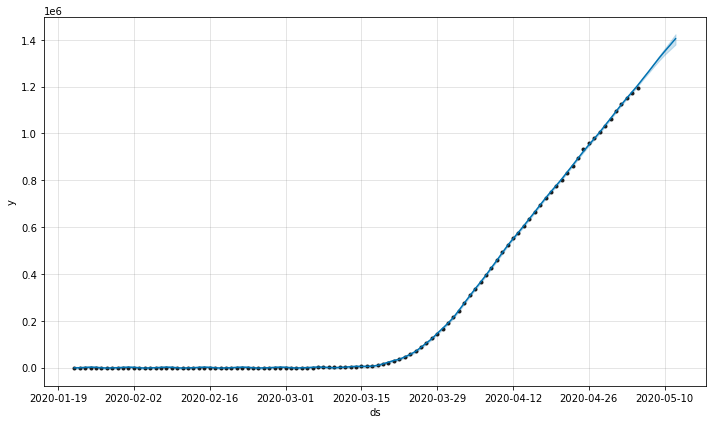

In [81]:
#Forecast plot calling Prophet.plot method and passing forecast dataframe
confirmed_forecast_plot = m.plot(forecast4)

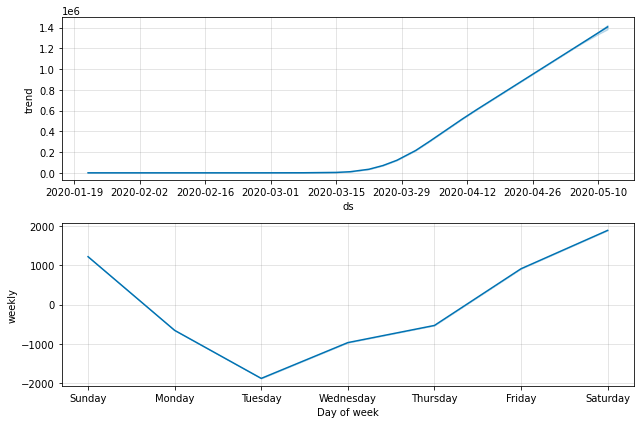

In [82]:
#Plot components
confirmed_forecast_plot =m.plot_components(forecast4)

### 5.3 New Cases Prediction - 7 Days

In [83]:
us_newcases

,date,NewCases
0,1/21/2020,1
1,1/22/2020,0
2,1/23/2020,0
3,1/24/2020,1
4,1/25/2020,1
...,...,...
99,4/29/2020,26401
100,4/30/2020,30393
101,5/1/2020,33984
102,5/2/2020,29598


In [84]:
us_newcases.columns=['ds','y']
us_newcases.dtypes

ds    object
y      int64
dtype: object

In [85]:
us_newcases['ds']=pd.to_datetime(us_newcases['ds'])

In [86]:
us_newcases.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [87]:
m1 = Prophet(interval_width=0.95)
m1.fit(us_newcases)
future1 = m1.make_future_dataframe(periods=7)
future1.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
106,2020-05-06
107,2020-05-07
108,2020-05-08
109,2020-05-09
110,2020-05-10


In [88]:
#Predicting the future with date, and upper and lower limit of y value 
forecast_dailyNcases = m.predict(future)
forecast_dailyNcases[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
102,2020-05-03,1.151023e+06,1.146976e+06,1.155434e+06
103,2020-05-04,1.177662e+06,1.173645e+06,1.182244e+06
104,2020-05-05,1.204954e+06,1.200837e+06,1.209474e+06
105,2020-05-06,1.234387e+06,1.229704e+06,1.238946e+06
106,2020-05-07,1.263344e+06,1.258447e+06,1.268575e+06
107,2020-05-08,1.293310e+06,1.287020e+06,1.300295e+06
108,2020-05-09,1.322809e+06,1.313459e+06,1.333489e+06
109,2020-05-10,1.350656e+06,1.337816e+06,1.366560e+06
110,2020-05-11,1.377295e+06,1.360750e+06,1.396234e+06
111,2020-05-12,1.404587e+06,1.382857e+06,1.428822e+06


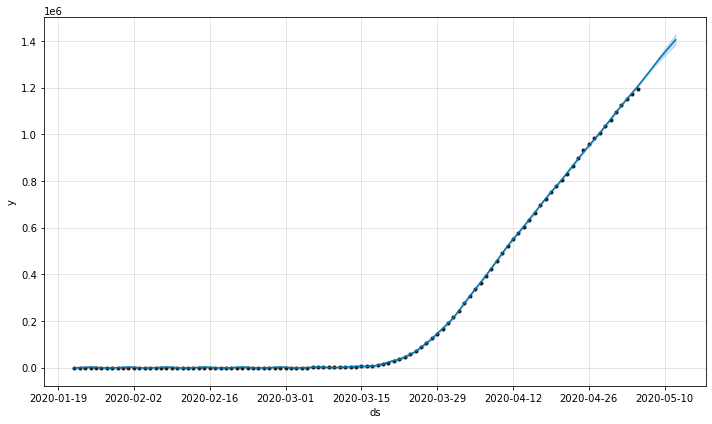

In [89]:
#Forecast plot calling Prophet.plot method and passing forecast dataframe
newcases_forecast_plot = m.plot(forecast_dailyNcases)

### 5.4 New Case Prediction - 14 Days

In [90]:
m2 = Prophet(interval_width=0.95)
m2.fit(us_newcases)
future1 = m1.make_future_dataframe(periods=14)
future1.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
113,2020-05-13
114,2020-05-14
115,2020-05-15
116,2020-05-16
117,2020-05-17


In [91]:
#Predicting the future with date, and upper and lower limit of y value 
forecast_dailyNcases1 = m.predict(future)
forecast_dailyNcases1[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
102,2020-05-03,1.151023e+06,1.146863e+06,1.155026e+06
103,2020-05-04,1.177662e+06,1.173304e+06,1.181998e+06
104,2020-05-05,1.204954e+06,1.200570e+06,1.209078e+06
105,2020-05-06,1.234387e+06,1.229936e+06,1.238915e+06
106,2020-05-07,1.263344e+06,1.258685e+06,1.268555e+06
107,2020-05-08,1.293310e+06,1.286558e+06,1.300228e+06
108,2020-05-09,1.322809e+06,1.313191e+06,1.332317e+06
109,2020-05-10,1.350656e+06,1.336017e+06,1.363390e+06
110,2020-05-11,1.377295e+06,1.358253e+06,1.394056e+06
111,2020-05-12,1.404587e+06,1.382692e+06,1.425083e+06


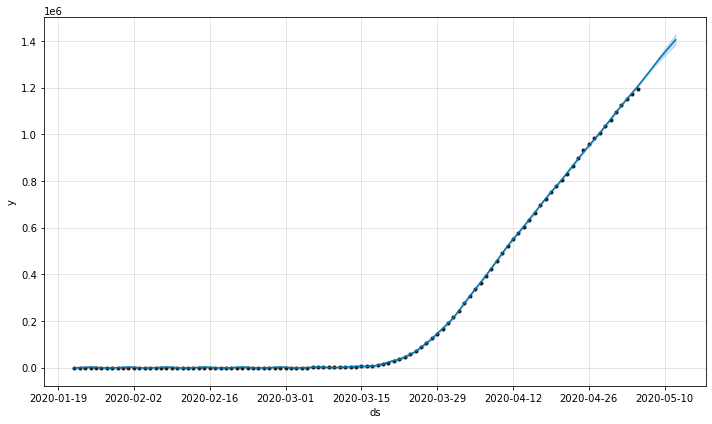

In [92]:
#Forecast plot calling Prophet.plot method and passing forecast dataframe
newcases_forecast_plot = m.plot(forecast_dailyNcases)

In [93]:
forecast_dailyNcases2=forecast_dailyNcases1.copy()
forecast_dailyNcases2=forecast_dailyNcases2.drop(['yhat_lower','yhat_upper','trend','trend_lower','trend_upper','additive_terms','additive_terms_lower','additive_terms_upper','weekly','weekly_lower','weekly_upper','multiplicative_terms','multiplicative_terms_lower','multiplicative_terms_upper'], axis=1)
forecast_dailyNcases2 = forecast_dailyNcases2.rename(columns={'ds':'Date','yhat':'ForecastedNewCases'})

In [94]:
forecast_dailyNcases2.tail(10)

,Date,ForecastedNewCases
102,2020-05-03,1.151023e+06
103,2020-05-04,1.177662e+06
104,2020-05-05,1.204954e+06
105,2020-05-06,1.234387e+06
106,2020-05-07,1.263344e+06
107,2020-05-08,1.293310e+06
108,2020-05-09,1.322809e+06
109,2020-05-10,1.350656e+06
110,2020-05-11,1.377295e+06
111,2020-05-12,1.404587e+06


In [95]:
fig = px.bar(forecast_dailyNcases2, x="Date", y="ForecastedNewCases", color='ForecastedNewCases', orientation='v', height=600,
             title='New Coronavirus Cases in the US', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### Reference
us_daily.csv - https://github.com/COVID19Tracking/covid-tracking-data/blob/master/data/us_daily.csv
worldmetersUS1.csv - https://www.worldometers.info/coronavirus/country/us/
Notebook Reference - https://colab.research.google.com/drive/1_I9hdYF9tE4EKI9WEuojYdUYXHXG04I9#scrollTo=UDv_-qMRepkF